In [ ]:
import cv2
cv2.__version__

'4.1.2'

**1. Write a Python code that will do the following
A. Read a gray scale image
B. Display that image.**

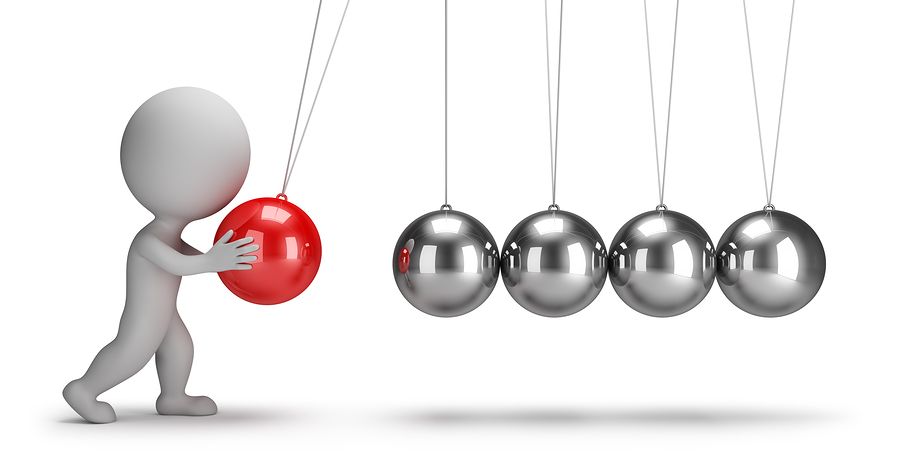

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/img.jpg")
cv2_imshow(image)

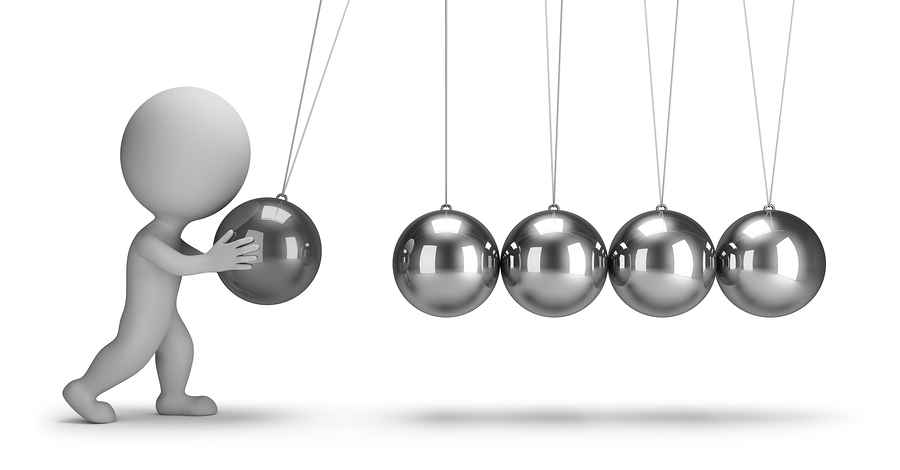

In [ ]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

**C. Reads a gray scale image and generates the flipped image of original image.**

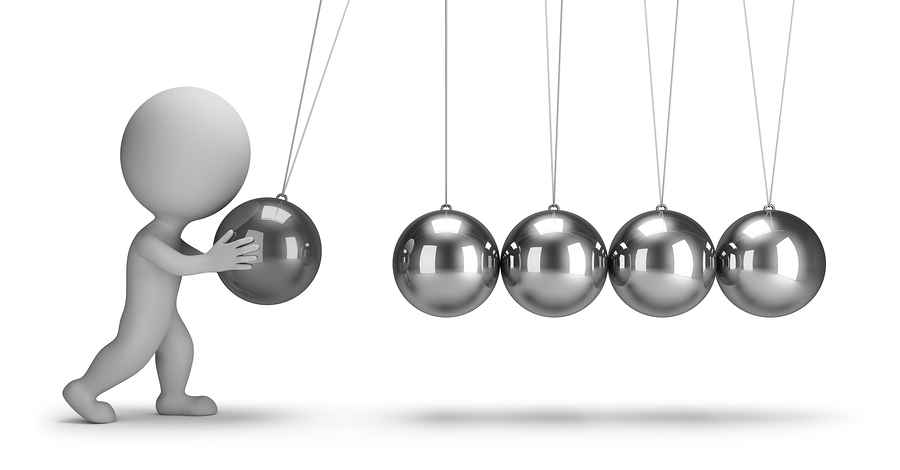

In [ ]:
cv2_imshow(gray_image)

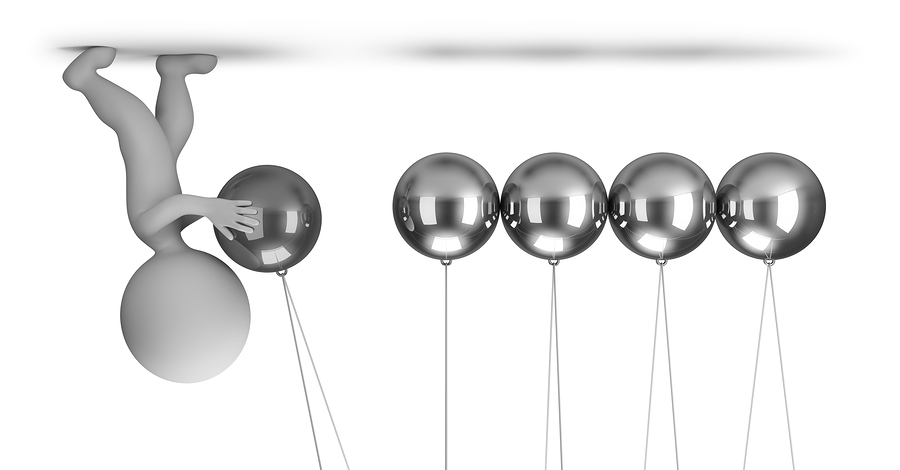

In [ ]:
#0 to flip vertically 
image_flipped = cv2.flip(gray_image, 0)
cv2_imshow(image_flipped)

**D. Again display the image such that the pixels having intensity values below than 50 will display as black and pixels
having intensity values above than 150 will display as white. And the pixels between these will display as it is.**


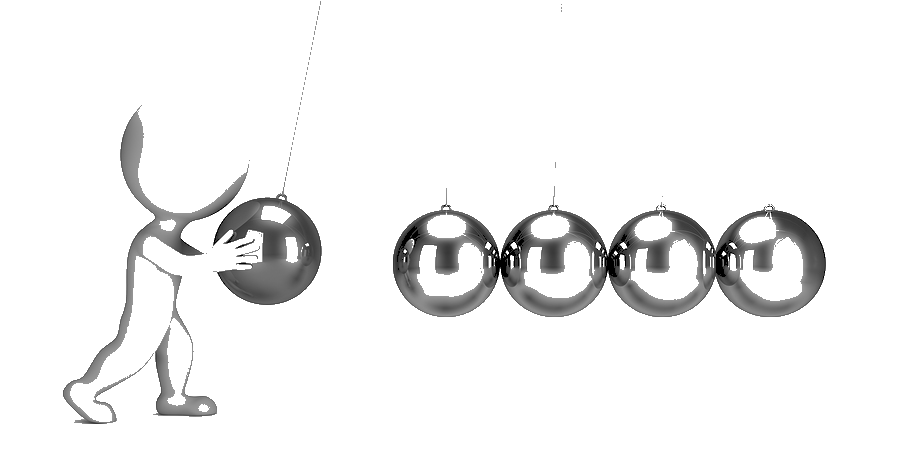

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#reading image
img=gray_image

#new image 
new=np.zeros((img.shape[0],img.shape[1]))

#values<50=0 and values>150=255 
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if(img[i,j]<50):
      new[i,j]=0
    elif(img[i,j]>150):
      new[i,j]=255
    else:
      new[i,j]=img[i,j]

#output image
cv2_imshow(new)

**2. Imagine that we have an image with pixels like below. Write an appropriate code to show the histogram
representation of the provided image.**

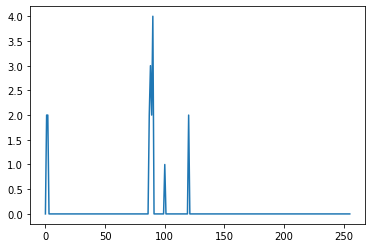

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
img=np.array([[87,90,1],[1,89,89],[87,120,120],[88,100,90],[2,88,88],[2,90,90]])
#gray levels from 0 to 255 
gray_level=np.arange(0,256)
No_of_pixels=np.zeros(256)
for i in img:
  for j in i:
    No_of_pixels[j]=No_of_pixels[j]+1

plt.plot(gray_level,No_of_pixels)
plt.show()


**3. Write a program to Perform contrast stretching on the following image of a woman's face. Record the values of a, b, c, d used for the operation.**

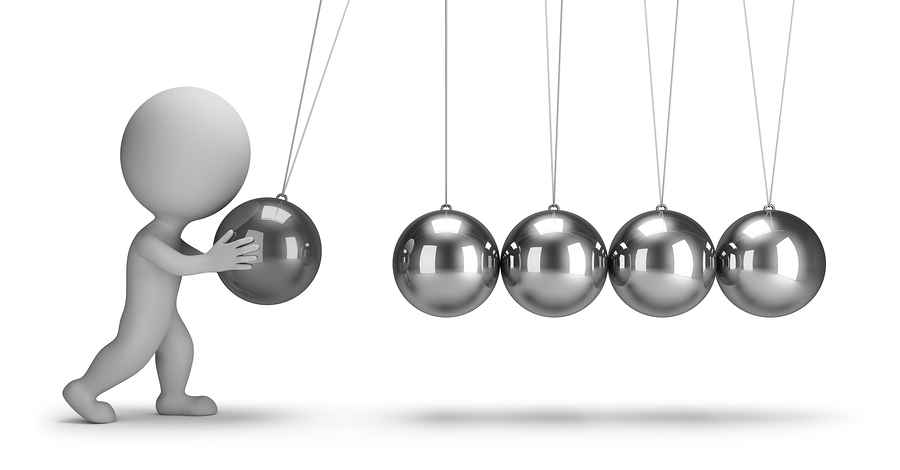

In [ ]:
#contrast stretching 

# s=(r-c)(b-a)/(d-c) + a for each pixel r
# for 8 bit gray scale 
# a=0
# b=255
# c=lowest value of pixel in image 
# d = highest value of pixel in image 

#Reading gray scale image
img1=gray_image

# Create zeros array to store the stretched image
simg = np.zeros((img1.shape[0],img1.shape[1]))

c=img1.min()
d=img1.max()
a=0
b=255


for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    simg[i,j]=int(((img1[i,j]-c)*(b-a)/(d-c))+a)

#showing the strecthed image 
cv2_imshow(simg)



**Now perform histogram equalization
on the original image.**

---



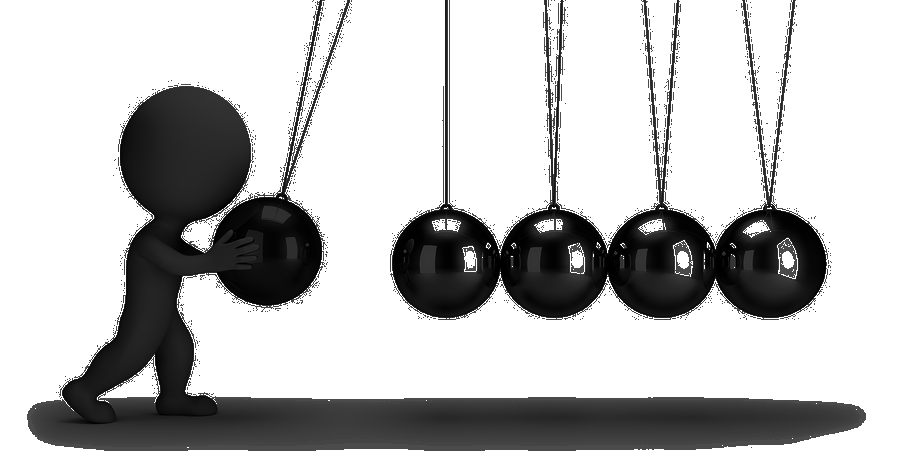

In [ ]:
#histogram equalization on original image 
img=gray_image

#gray level
gray_level=np.arange(0,256)
#no of pixels of each gray level : Nk
Nk=np.zeros(256)
for i in img:
  for j in i:
    Nk[j]=Nk[j]+1

#total no of pixels 
NPixels=Nk.sum()

#pdf
pdf=np.zeros(256)
for i in range(256):
  pdf[i]=Nk[i]/NPixels

#cdf 
cdf=np.zeros(256)
cdf[0]=pdf[0]
for i in range(1,256):
  cdf[i]=cdf[i-1]+pdf[i]

#cdf*maximum pixel value rounded off
hel=np.zeros(256)
for i in range(256):
  hel[i]=round(cdf[i]*255)

#equalized image 
equalized_img=np.zeros((img.shape[0],img.shape[1]))
for i in range(equalized_img.shape[0]):
  for j in range(equalized_img.shape[1]):
    equalized_img[i,j]=hel[img[i,j]]

#output image 
cv2_imshow(equalized_img)

**Compare the original picture and its histogram with the stretched
picture and its histogram as well as with the equalized picture and its histogram.**

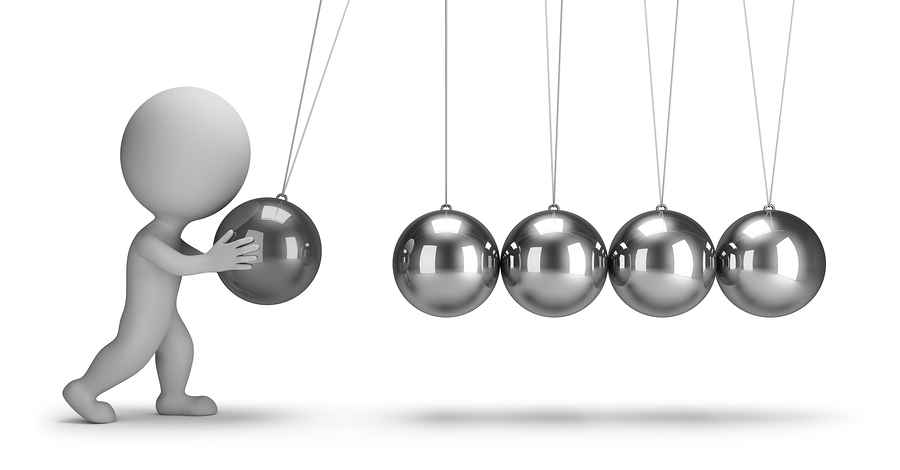

In [ ]:
#original picture
cv2_imshow(gray_image)

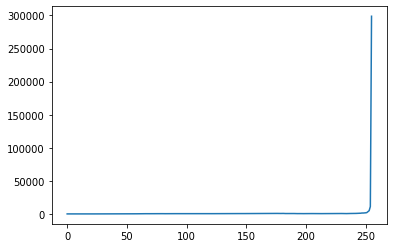

In [ ]:
#original image histogram 
gray_level=np.arange(0,256)
No_of_pixels=np.zeros(256)
for i in gray_image:
  for j in i:
    No_of_pixels[j]=No_of_pixels[j]+1

plt.plot(gray_level,No_of_pixels)
plt.show()

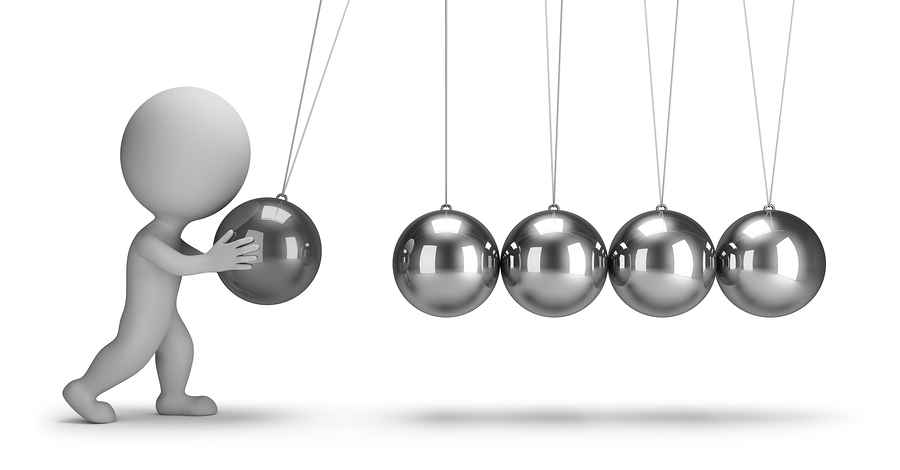

In [ ]:
#stretched image
cv2_imshow(simg)

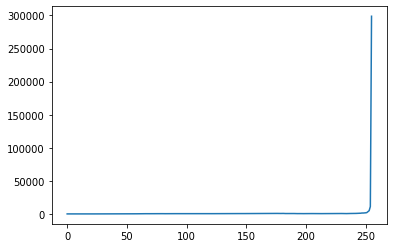

In [ ]:
#stretched image histogram 
graylevel=np.arange(0,256)
pixels=np.zeros(256)
# pixels
for i in range(simg.shape[0]):
  for j in range(simg.shape[1]):
    pixels[int(simg[i,j])]=pixels[int(simg[i,j])]+1

plt.plot(graylevel,pixels)
plt.show()

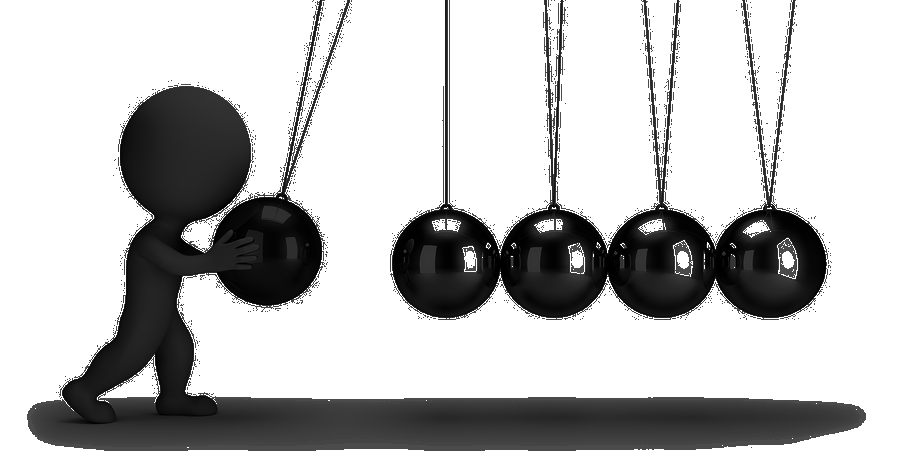

In [ ]:
#equalized image 
cv2_imshow(equalized_img)

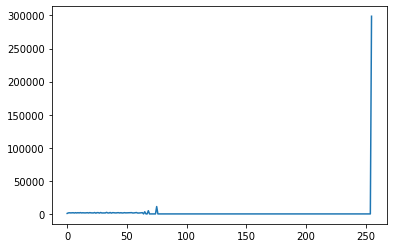

In [ ]:
#equalized image histogram 
grayl=np.arange(0,256)
pixel=np.zeros(256)
# pixels
for i in range(equalized_img.shape[0]):
  for j in range(equalized_img.shape[1]):
    pixel[int(equalized_img[i,j])]=pixel[int(equalized_img[i,j])]+1

plt.plot(grayl,pixel)
plt.show()

**4. Related image operations .**
**a. Load the given image and split it into three grayscale images that represent the intensities.**

blue image 


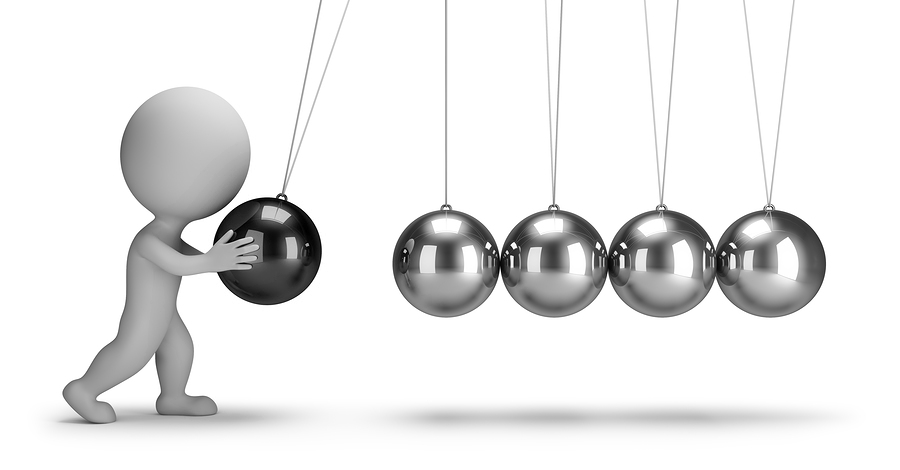



green image 


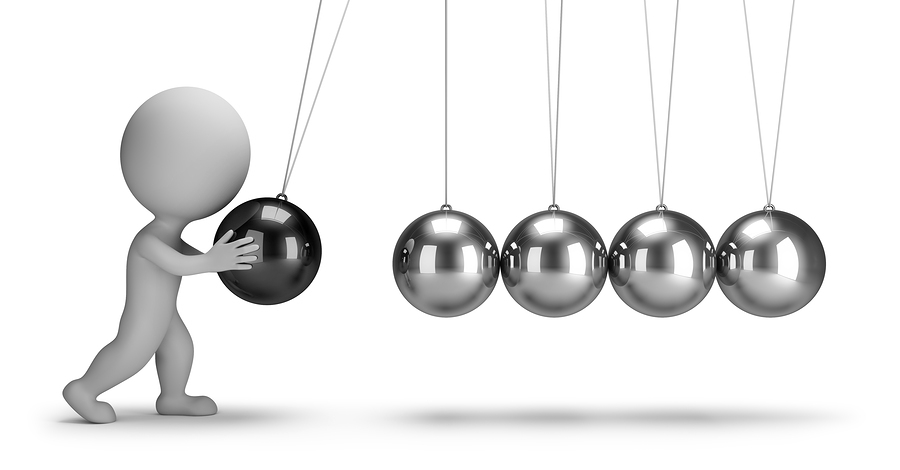



red image 


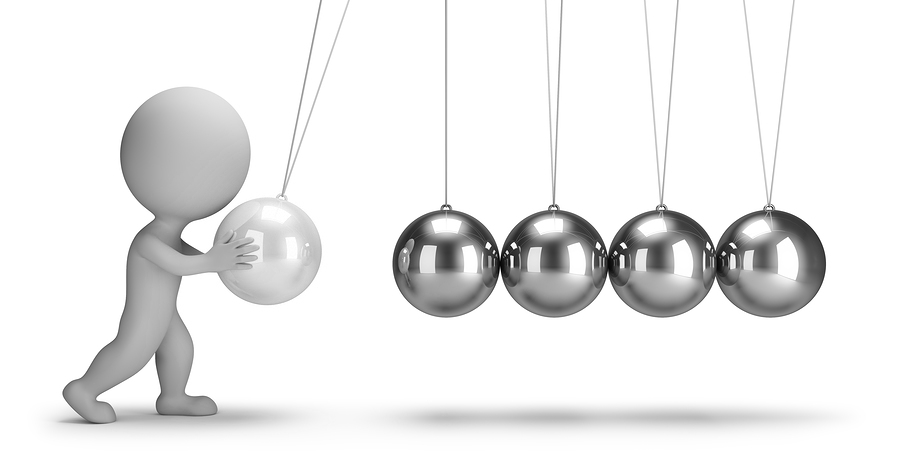

In [51]:
img = cv2.imread("/content/img.jpg")

#splitting the image into three grayscale images 
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

print("blue image ")
cv2_imshow(b)

print("\n")
print("green image ")
cv2_imshow(g)

print("\n")
print("red image ")
cv2_imshow(r)

**b. Load the given image and perform the shifting operation by considering
all RGB channel or axis one by one.**

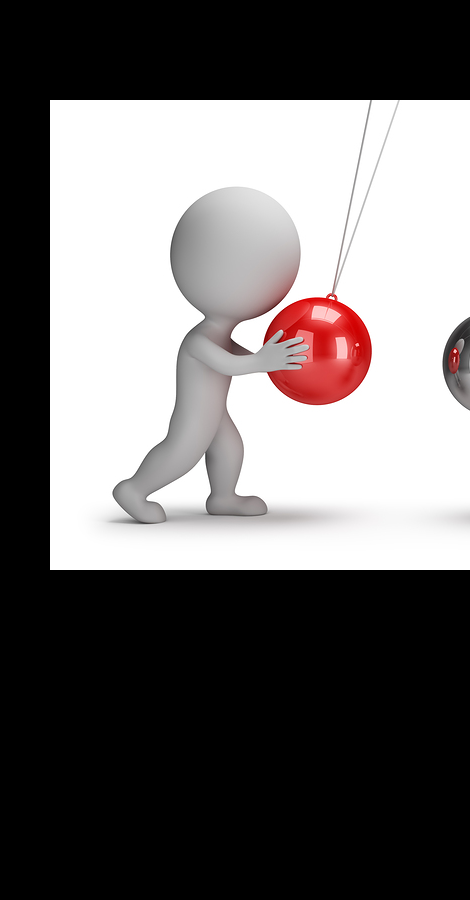

In [50]:
#reading image 
img=cv2.imread("/content/img.jpg")
rows,cols,height=img.shape

#shifting image 50pixels horizontally and 100 pixels vertically 
matrix=np.float32([[1,0,50],[0,1,100]])
new_img=cv2.warpAffine(img,matrix,(rows,cols))
cv2_imshow(new_img)

**5.Negative of a Image .
Load given grayscale image and writ a code to perform Negation operation over the input**

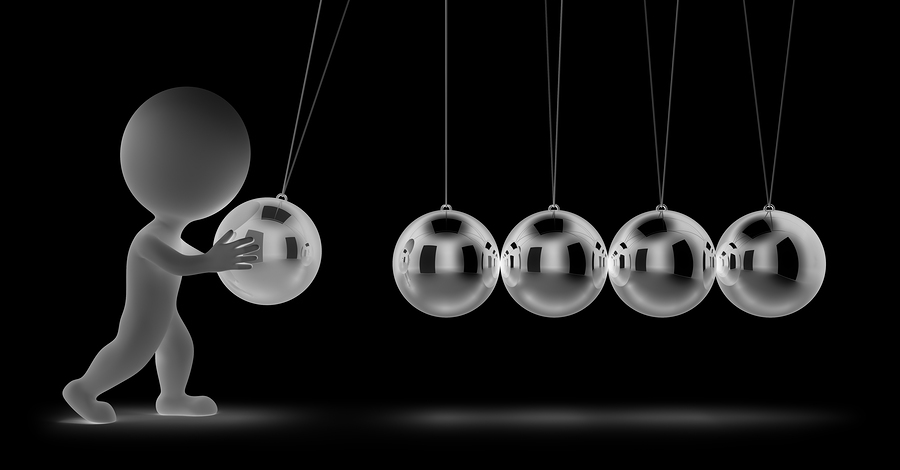

In [ ]:
#reading a grayscale image 
img=gray_image

#maximum pixel value in image
l=img.max()

nimg=np.zeros((img.shape[0],img.shape[1]))

#doing negative of image l-r l=maximum pixel value 

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    nimg[i,j]=l-img[i,j]

#output
cv2_imshow(nimg)

**6. Thresholding of an Image**

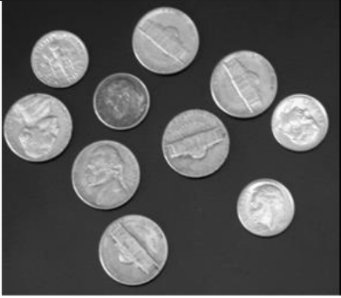

In [ ]:
#reading the image 
image=cv2.imread("/content/imgt.png")
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

enter a threshold value 134


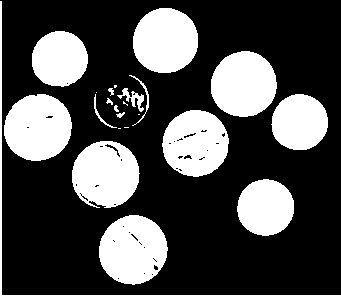

In [ ]:
#taking threshold value
t=int(input("enter a threshold value "))

out=np.zeros((img.shape[0],img.shape[1]))
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if(img[i,j]<t):
      out[i,j]=0
    else:
      out[i,j]=255
#display output image 
cv2_imshow(out)

**7. Related to bit plane slicing. 
Load an input image (grayscale) and extract each bit using bitwise AND operation.
Display all the bit planes formed by bits extracted. Also, reconstruct the input image
using extracted bit planes.**

original image 


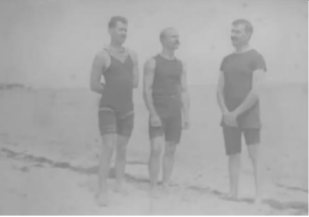





bit planes of original image 


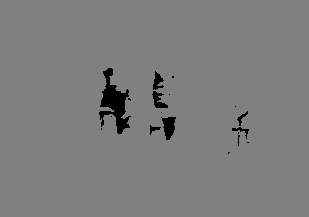

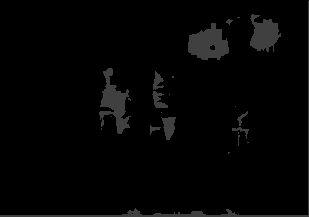

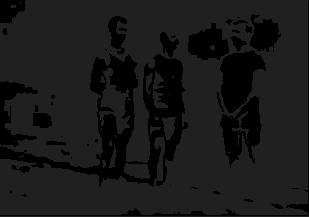

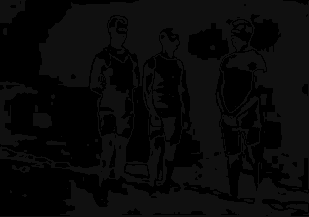

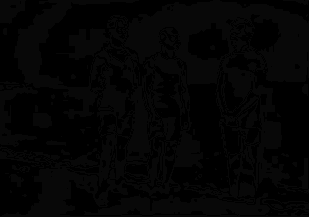

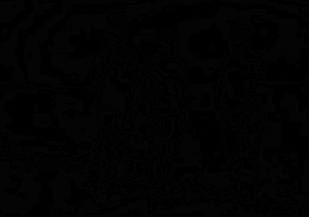

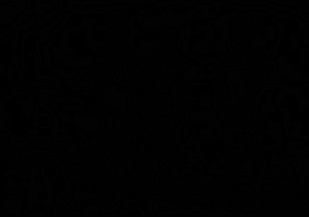

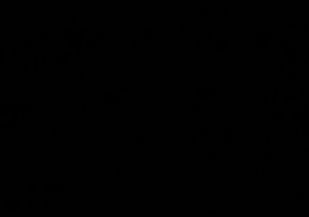



reconstructed image 


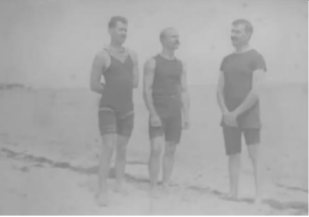

In [53]:
#mycode 
image=cv2.imread("/content/img2.png")
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def Integer_to_string(a):
  s=""
  while(a!=0):
    s=s+str(a&1)
    a=int(a/2)
  
  while(len(s)<8):
    s=s+'0'
  s=s[::-1]
  return s

#bit8 
bit8=np.zeros((img.shape[0],img.shape[1]))
bit7=np.zeros((img.shape[0],img.shape[1]))
bit6=np.zeros((img.shape[0],img.shape[1]))
bit5=np.zeros((img.shape[0],img.shape[1]))
bit4=np.zeros((img.shape[0],img.shape[1]))
bit3=np.zeros((img.shape[0],img.shape[1]))
bit2=np.zeros((img.shape[0],img.shape[1]))
bit1=np.zeros((img.shape[0],img.shape[1]))

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    s=Integer_to_string(img[i,j])
    bit8[i,j]=int(s[0])*128
    bit7[i,j]=int(s[1])*64
    bit6[i,j]=int(s[2])*32
    bit5[i,j]=int(s[3])*16
    bit4[i,j]=int(s[4])*8
    bit3[i,j]=int(s[5])*4
    bit2[i,j]=int(s[6])*2
    bit1[i,j]=int(s[7])*1

#original image 
print("original image ")
cv2_imshow(img)
print("\n")
print("\n")


#bit planes of original image 
print("bit planes of original image ")
cv2_imshow(bit8)
cv2_imshow(bit7)
cv2_imshow(bit6)
cv2_imshow(bit5)
cv2_imshow(bit4)
cv2_imshow(bit3)
cv2_imshow(bit2)
cv2_imshow(bit1)


#reconstruction of image from bit planes 
new=np.zeros((img.shape[0],img.shape[1]))
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    new[i,j]=bit8[i,j]+bit7[i,j]+bit6[i,j]+bit5[i,j]+bit4[i,j]+bit3[i,j]+bit2[i,j]+bit1[i,j]

print("\n")

#reconstructed image
print("reconstructed image ") 
cv2_imshow(new)


**8. Related to Histogram Specification . Given original image and targetted image perform histogram specification**

original image


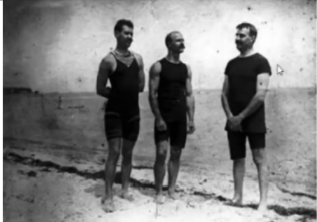



target image


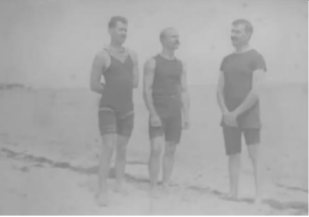

In [54]:
#reading both images 
image=cv2.imread("/content/img1.png")
A=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("original image")
cv2_imshow(A)

print("\n")
#target image 
image2=cv2.imread("/content/img2.png")
B=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
print("target image")
cv2_imshow(B)


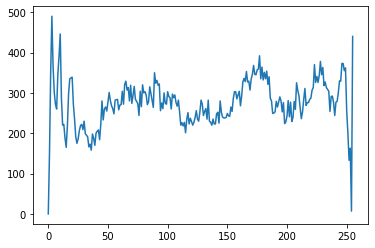

In [55]:

graylevel=np.arange(256)
Npa=np.zeros(256)
Npb=np.zeros(256)

#step1 finding cdf of A and B 
for i in A:
  for j in i:
    Npa[j]=Npa[j]+1

for i in B:
  for j in i:
    Npb[j]=Npb[j]+1

#histogram of original image 
plt.plot(graylevel,Npa)
plt.show()


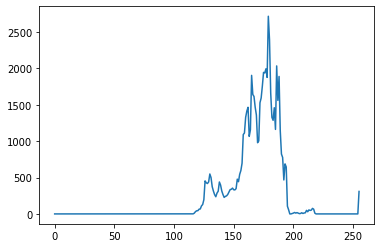

In [ ]:
#histogram of target image 
plt.plot(graylevel,Npb)
plt.show()


output image 


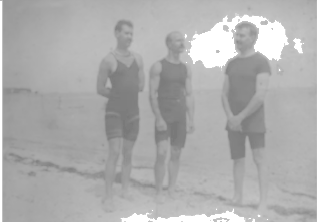

In [56]:

#continuing the algorithm 
#finding cdf of A and B

cdfA=np.zeros(256)
cdfB=np.zeros(256)

cdfA[0]=Npa[0]
cdfB[0]=Npb[0]
for i in range(1,256):
  cdfA[i]=cdfA[i-1]+Npa[i]
  cdfB[i]=cdfB[i-1]+Npb[i]

# print(cdfA)
# print("\n")
# print(cdfB)

#step2 matching where cdfB[i]>cdfA[j] 
mat=np.zeros(256)
for i in range(cdfA.shape[0]):
  for j in range(cdfB.shape[0]):
    if(cdfB[j]>=cdfA[i]):
      mat[i]=j
      break
    if(j==cdfB.shape[0]-1 and cdfB[j]<cdfA[i]):
      mat[i]=j
      break

# print(mat)

#mapping pixel value of original image to mat to get output image
out=np.zeros((A.shape[0],A.shape[1]))
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
    out[i,j]=mat[A[i,j]]

print("output image ")
cv2_imshow(out)

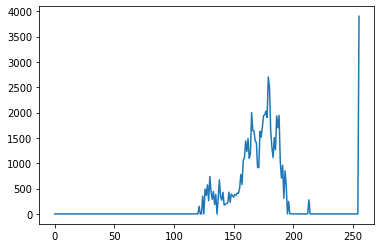

In [ ]:
#histogram of output image 
Npo=np.zeros(256)
# Npo
for i in range(out.shape[0]):
  for j in range(out.shape[1]):
    Npo[int(out[i,j])]=Npo[int(out[i,j])]+1
plt.plot(graylevel,Npo)
plt.show()

**9. Low pass filtering in spatial domain.**

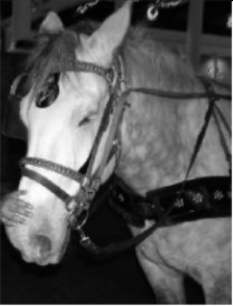

In [ ]:
image=cv2.imread("/content/h.png")
h=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(h)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


low pass filtered image 


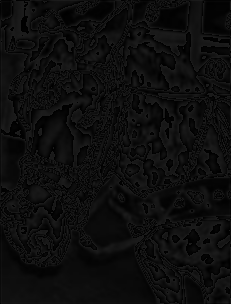

In [58]:
# default of mask 3*3 
mask=np.ones((3,3))
mask=mask/9


#ignoring the borders in the image the new image size will be 2 less than of original image 
low=np.zeros((h.shape[0]-2,h.shape[1]-2))

for i in range(low.shape[0]):
  for j in range(low.shape[1]):
    low[i,j]=(h[i,j]+h[i-1,j]+h[i+1,j]+h[i,j-1]+h[i,j+1]+h[i+1,j+1]+h[i+1,j-1]+h[i-1,j-1]+h[i-1,j+1])/9

#output image after low pass fitering with 3*3 mask 
print("low pass filtered image ")
cv2_imshow(low)

**10.High Pass filtering in spatial domain.**

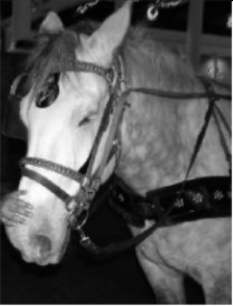

In [ ]:
#original image 
image=cv2.imread("/content/h.png")
h=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(h)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


high pass fitered image 


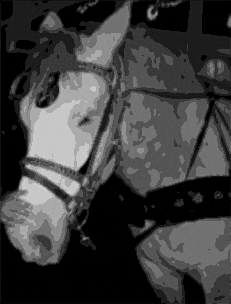

In [57]:
#mask [-1/9,-1/9,-1/9]
#      [-1/9,8/9,-1/9]
#     [-1/9,-1/9,-1/9]
#ignoring the borders in the image the new image size will be 2 less than of original image 
high=np.zeros((h.shape[0]-2,h.shape[1]-2))

for i in range(high.shape[0]):
  for j in range(high.shape[1]):
    high[i,j]=((8*h[i,j])/9)-((h[i-1,j]+h[i+1,j]+h[i,j-1]+h[i,j+1]+h[i+1,j+1]+h[i+1,j-1]+h[i-1,j-1]+h[i-1,j+1])/9)


#output image after high pass fitering with 3*3 mask 
print("high pass fitered image ")
cv2_imshow(high)



**Show that highpass=original-lowpass**

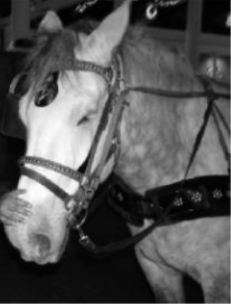



original-lowpass


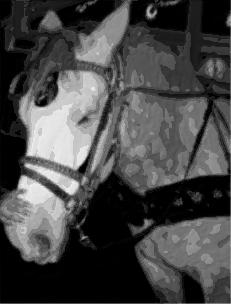



high image using mask


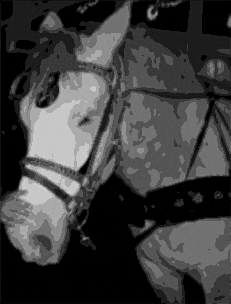

In [ ]:
#original image ignoring the borders 
original=np.delete(h,0,0)
original=np.delete(original,original.shape[0]-1,0)
original=np.delete(original,0,1)
original=np.delete(original,original.shape[1]-1,1)

#original image 
cv2_imshow(original)
print("\n")

#high image using original-lowpass
newhigh=original-low
print("original-lowpass")
cv2_imshow(newhigh)

#high image using mask 3*3
print("\n")
print("high image using mask")
cv2_imshow(high)

**11. Zooming by replication and interpolation.**

---


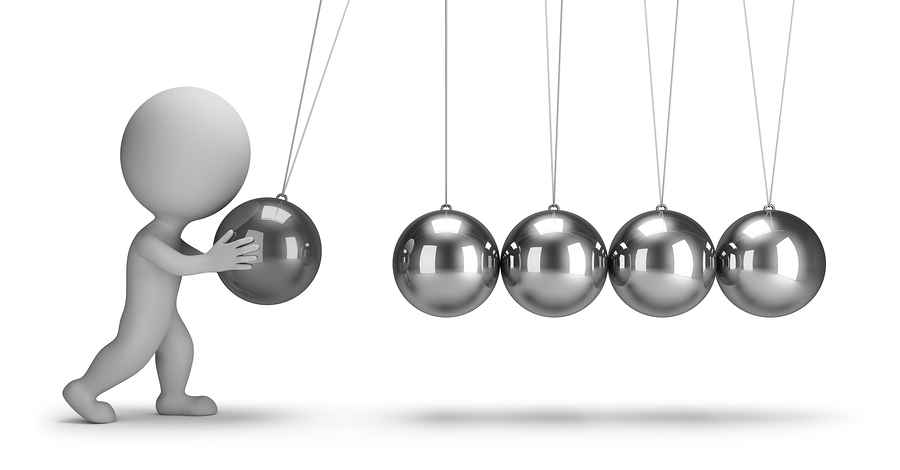

In [ ]:
#zooming by replication 

#original image 
image=cv2.imread("/content/img.jpg")
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

enter the times you want to zoom : 2


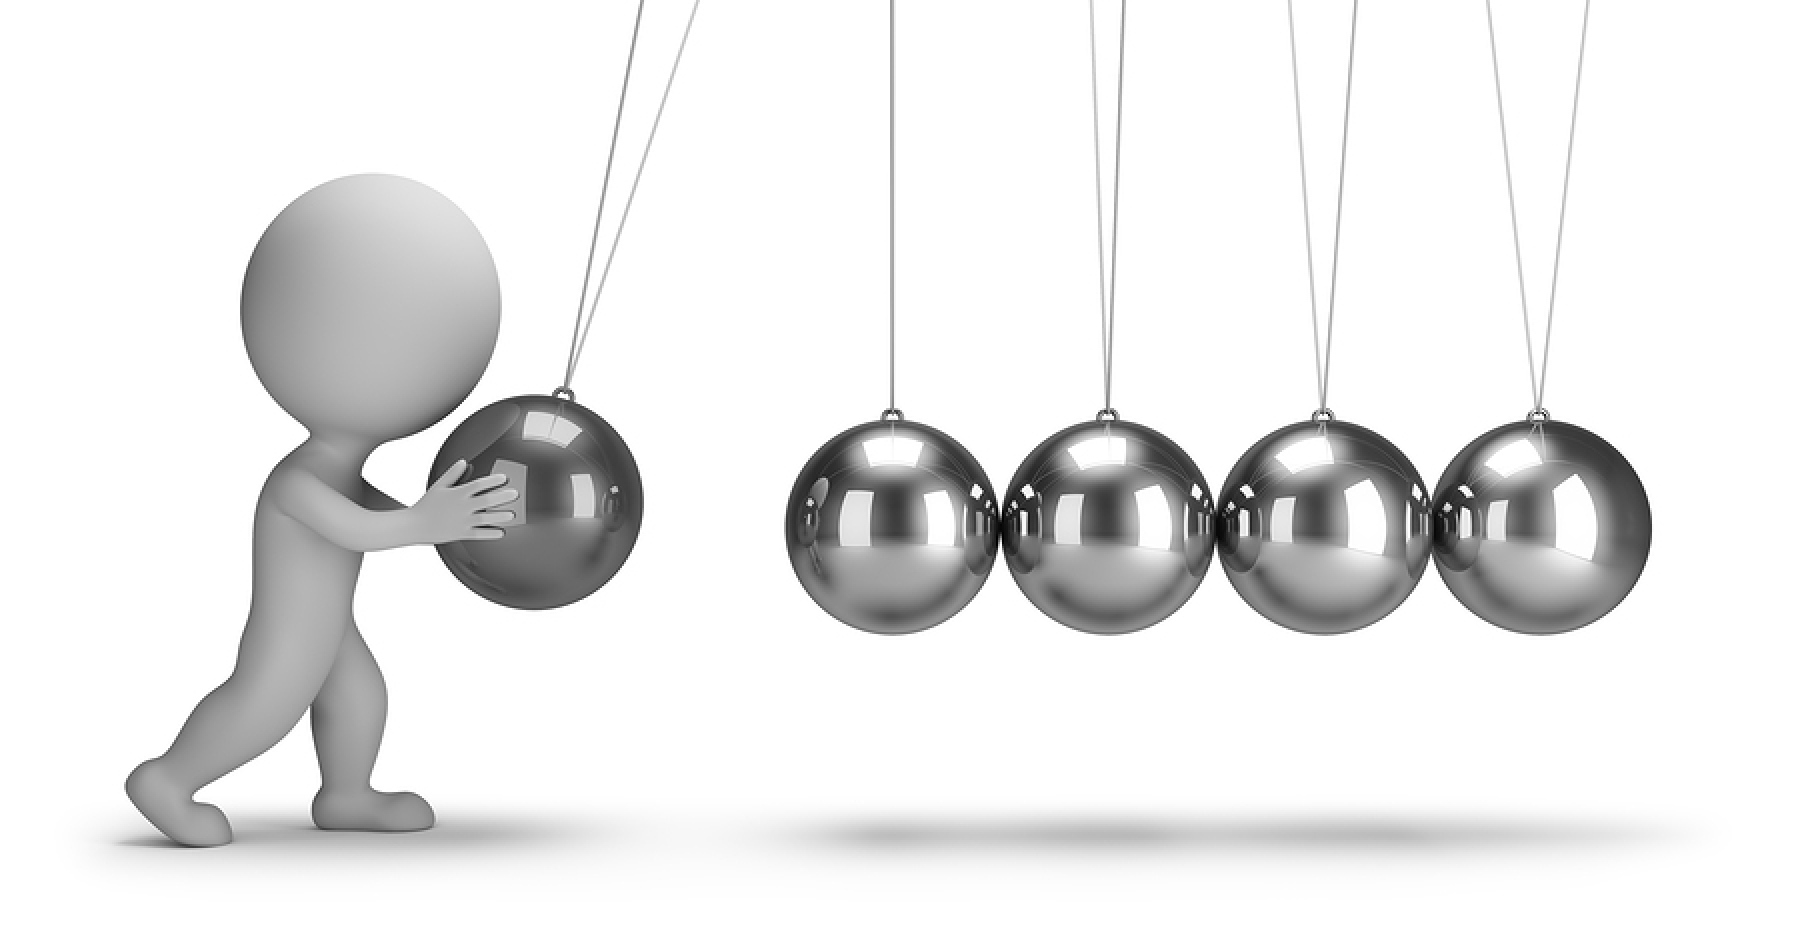

In [ ]:
#zooming x times using replication 

#zoom x times 
x=int(input("enter the times you want to zoom : "))

#replicate each pixel along row and column x times 
zoom_img=np.zeros((img.shape[0]*x,img.shape[1]*x))
for i in range(img.shape[0]*x):
  for j in range(img.shape[1]*x):
    zoom_img[i,j]=int(img[int(i/x),int(j/x)])

#output image 
cv2_imshow(zoom_img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


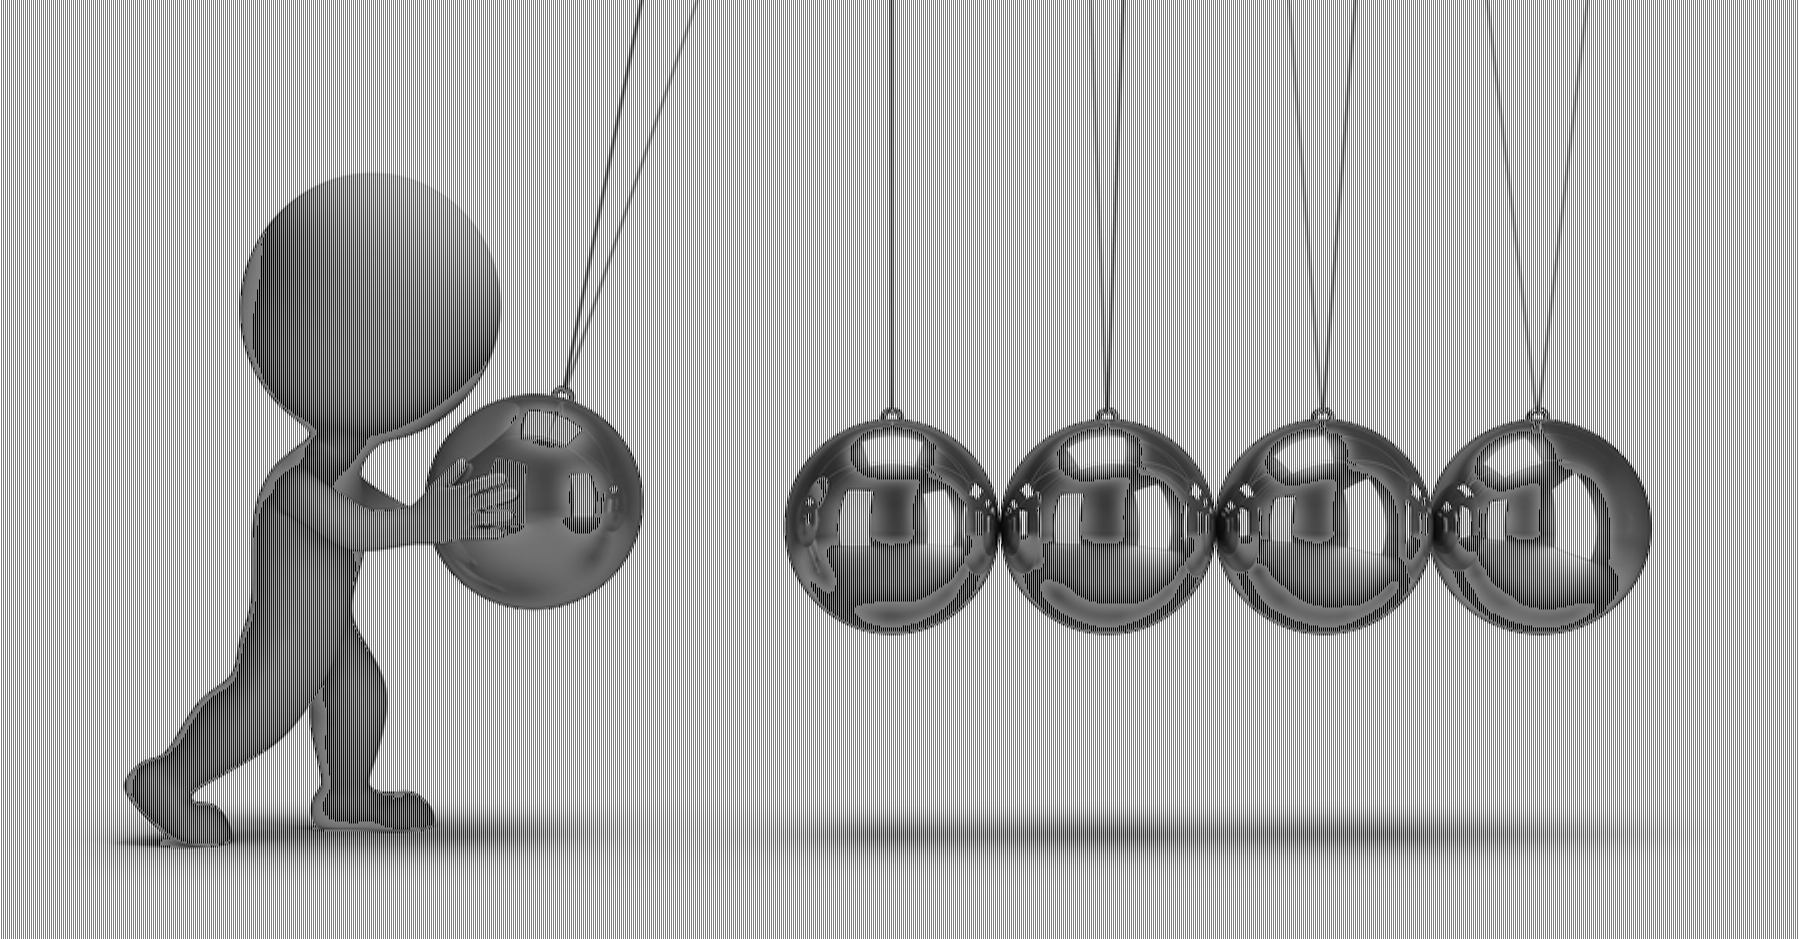

In [ ]:
#zooming with interpolation 

#Average of two adjacent pixels along the rows is taken and placed between two pixels

interpol_img1=np.zeros((img.shape[0],img.shape[1]*2-1))
for i in range(interpol_img1.shape[0]):
  for j in range(interpol_img1.shape[1]):
    if(j%2==1):
      interpol_img1[i,j]=int((img[i,int((j-1)/2)]+img[i,int((j+1)/2)])/2)
    else:
      interpol_img1[i,j]=img[i,int((j+1)/2)]

#Average of two adjacent pixels along the column is taken and placed between two pixels.

interpol_img2=np.zeros((img.shape[0]*2-1,img.shape[1]*2-1))
for i in range(interpol_img2.shape[0]):
  if(i%2==0):
    interpol_img2[i]=interpol_img1[int((i+1)/2)]
  else:
    for j in range(interpol_img2.shape[1]):
      interpol_img2[i,j]=int((interpol_img1[int((i-1)/2),j]+interpol_img1[int((i+1)/2),j])/2)

#output image 
cv2_imshow(interpol_img2)

